In [510]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np
from pylab import rcParams
rcParams['figure.figsize']= 15, 10

- Rank - Ранжирование от общего объема продаж
- Name - Наименование игры
- Platform - Игровая платформа
- Year - Год выпуска игры
- Genre - Жанр игры
- Publisher - Издатель игры
- NA_Sales - Продажи в Северной Америке (in millions)
- EU_Sales - Продажи в Европе (in millions)
- JP_Sales - Продажи в Японии (in millions)
- Other_Sales - Продажи в остальном мире (in millions)
- Global_Sales - общие мировые продажи.

In [511]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 2.1+ MB


In [513]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [514]:
df.duplicated().sum()

0

Вывод:
- всего 11 признаков и 16598 значений в них;
- такие признаки как год выпуска игры и издательство имеют пропуски, пропуски не критичны, так как их немного;
- дубликаты отсутствуют;
- в принципе все типы данных соответствуют своим признакам, за исключением года выпуска игры (Year) поменяем с float на int, но так как в данном признаке присутсвуют пропущенные значения это создаст некоторые трудности в замене типа данных;

### Посмотрим каких игровых жанров большего всего:

Вывод:
    - Игры с жанром 'Action' и 'Sports' являются лидерами индустрии:
       - 'Action' - занимает 20% мирового рынка видеоигр, 'Sports' - 14%;
    - остальные игры идут более менее ровно;

### Посмотрим в какие годы больше всего выходило игр:

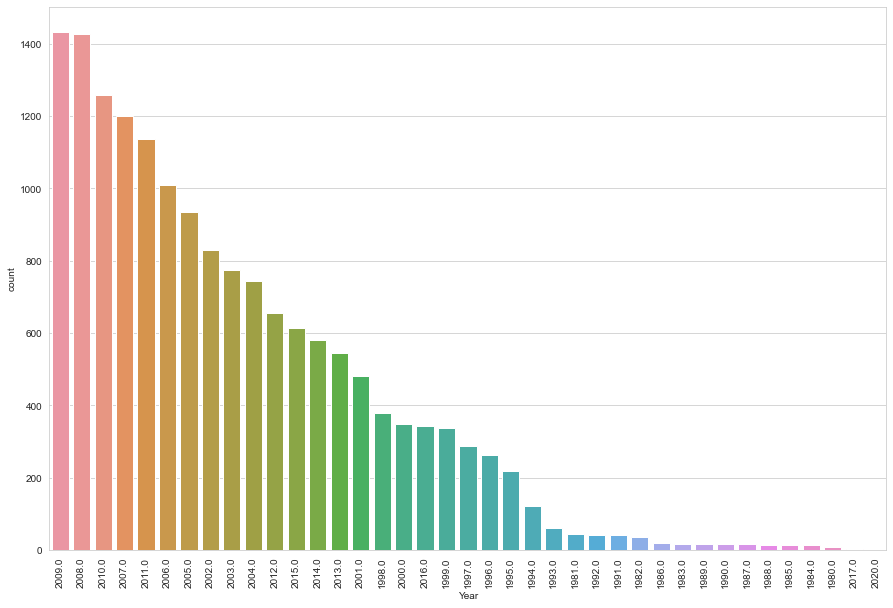

In [515]:
sns.countplot(x="Year", data=df, order = df['Year'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [516]:
df.Year.value_counts([0]).head(5)

2009.0    0.087840
2008.0    0.087656
2010.0    0.077159
2007.0    0.073722
2011.0    0.069732
Name: Year, dtype: float64

Вывод:
- 2009 и 2008 годы несомненные лидеры в выпуске видеоигр по 8.7% от мирового рынка;
- сразу за ними 2010, 2007 и 2011 годы - 7,7%, 7,4% и 7% соотвественно;

### Посмотрим какие игровые издательства лидеры индустрии:

In [517]:
# Так как игровых издательств представлено очень много в датасете, то ограничимся наиболее массовыми, первыми 20
top_20_Publisher = df['Publisher'].value_counts().head(20)

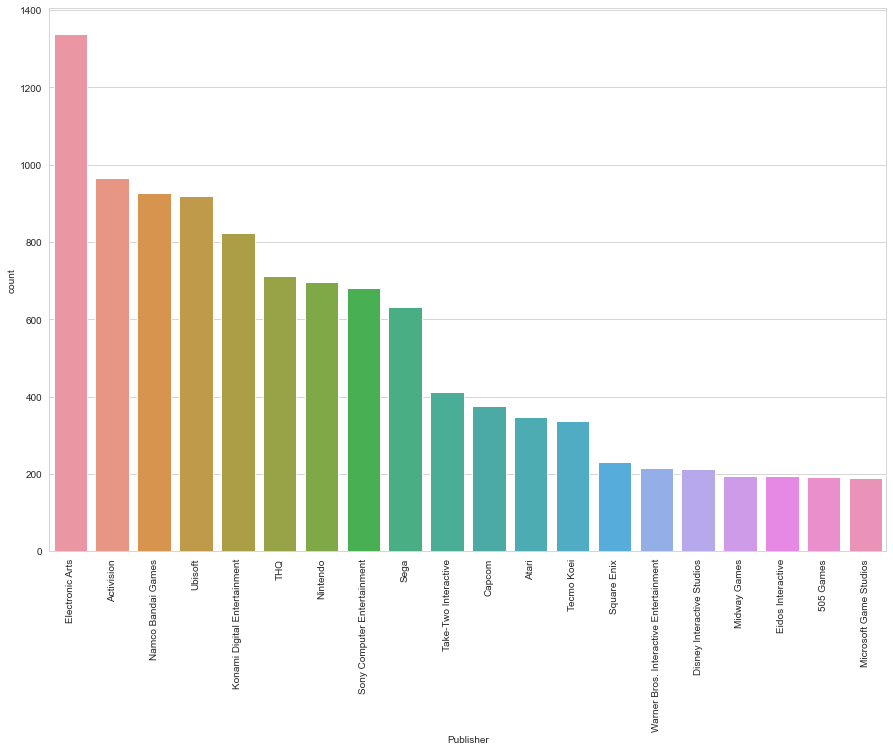

In [518]:
sns.countplot(x="Publisher", data=df, order = top_20_Publisher.index)
plt.xticks(rotation=90)
plt.show()

In [519]:
df['Publisher'].value_counts([0]).head(10)

Electronic Arts                 0.082193
Activision                      0.059297
Namco Bandai Games              0.056964
Ubisoft                         0.056350
Konami Digital Entertainment    0.050519
THQ                             0.043705
Nintendo                        0.042723
Sony Computer Entertainment     0.041864
Sega                            0.038794
Take-Two Interactive            0.025290
Name: Publisher, dtype: float64

Вывод:
    - несомненным лидером игровой индустрии является Electronic Arts c 8% мирового рынка видеоигр;
    - остальные игры идут в притирочку;

In [522]:
df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)

Publisher
Nintendo                       1784.43
Electronic Arts                1093.39
Activision                      721.41
Sony Computer Entertainment     607.28
Ubisoft                         473.54
Name: Global_Sales, dtype: float64

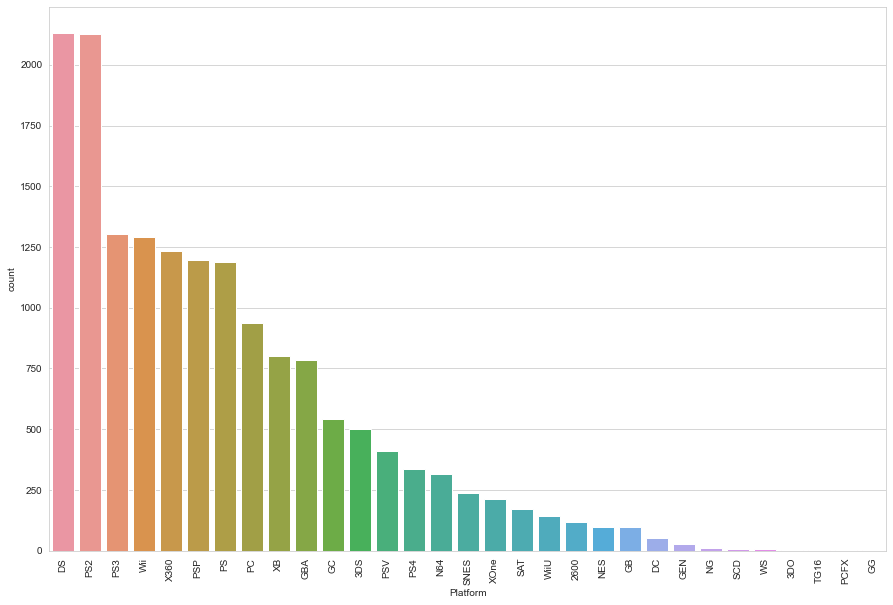

In [398]:
sns.countplot(x="Platform", data=df, order = df['Platform'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [400]:
df['Platform'].value_counts([0]).head(10)

DS      0.130808
PS2     0.130563
PS3     0.080044
Wii     0.079185
X360    0.075747
PSP     0.073476
PS      0.072985
PC      0.057578
XB      0.049291
GBA     0.048247
Name: Platform, dtype: float64

Вывод:
    - лидерами по количеству игр являются такие платформы как DS, PS2;
    - по 13% мирового рынка занимают имеено эти платформы; 

In [524]:
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5)

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
Name: Global_Sales, dtype: float64

### Посмотрим на динамику продаж видеоигр в зависимости от года

In [305]:
years_df = df.groupby('Year')[['Global_Sales']].sum().join(df.groupby('Year')[['Name']].count())

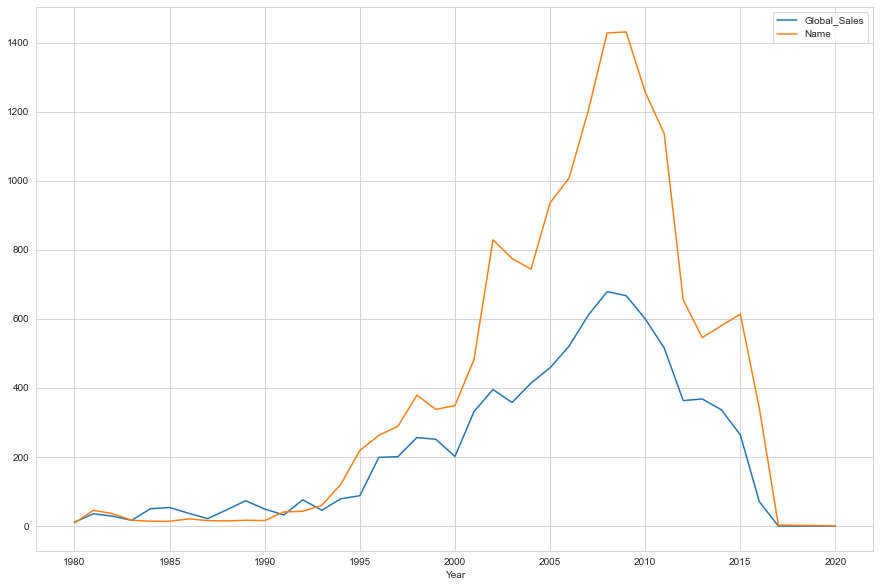

In [306]:
years_df.plot()
plt.show()

Вывод:
- в период с 1990 по 2008 годы был плавный рост по количеству выпуска видеоигр и соотвественно увеличению прибыли. Ви

### Посмотрим на динамику продаж в зависимости от года

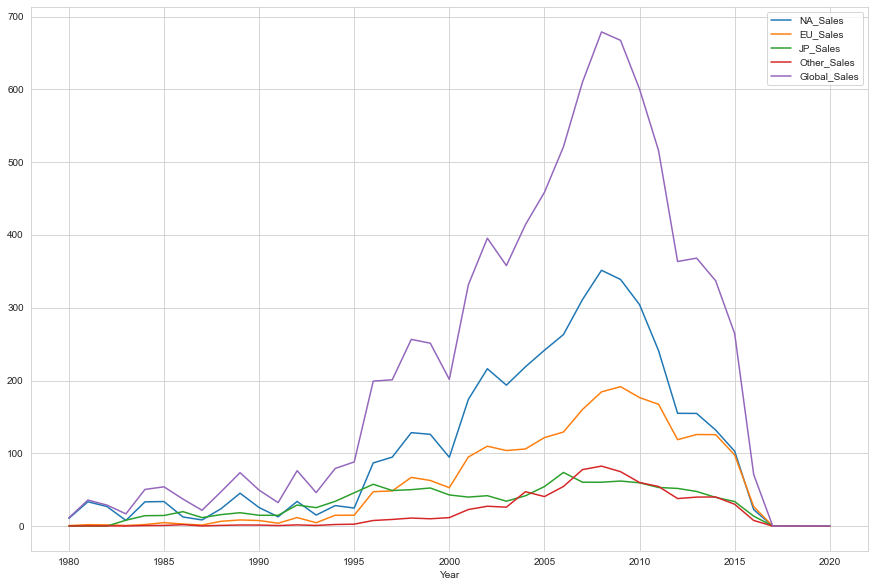

In [308]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year']]
sales_df.groupby('Year').sum().plot()
plt.show()

Вывод:
- из графика отчетливо видно, что независимо от географического местоположения основной пик продаж выпал на период 2005 - 2010 годы

In [315]:
top_years_of_sales = df.query('2005 <= Year <= 2010').fillna(0)
top_years_of_sales['Year'] = top_years_of_sales['Year'].astype('int')
top_years_of_sales.groupby('Year').agg({'Global_Sales':'sum',
                       'NA_Sales':'sum',
                       'EU_Sales':'sum',
                       'JP_Sales':'sum',
                       'Other_Sales':'sum'})

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,,
2005,458.51,241.58,121.56,54.28,40.55
2006,521.04,263.12,129.24,73.73,54.43
2007,609.92,311.18,160.18,60.29,77.58
2008,678.90,351.44,184.40,60.26,82.39
2009,667.30,338.85,191.59,61.89,74.77
2010,600.29,304.24,176.57,59.49,59.90


### Посмотрим на суммарные продажи игр по жанрам и игровым платформам:

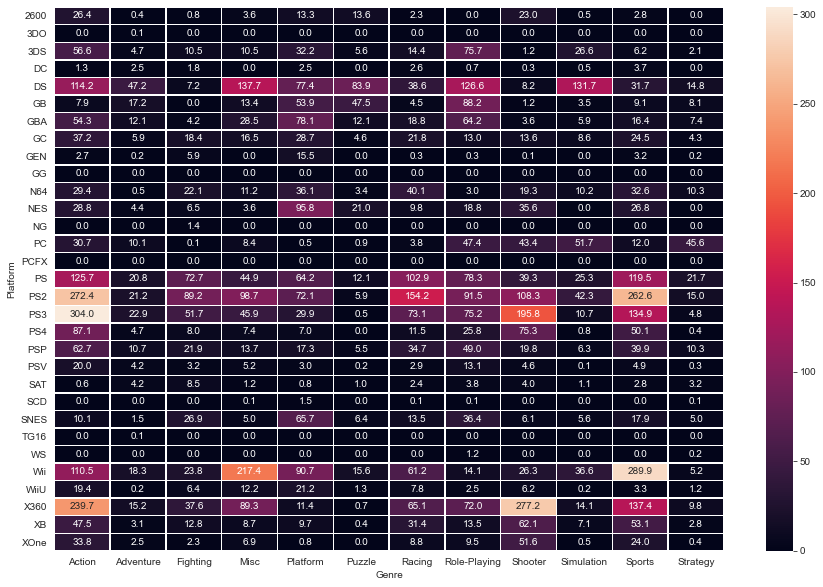

In [310]:
genre_sales = df.pivot_table(
                    index = 'Platform',
                    columns = 'Genre',
                    values = 'Global_Sales',
                    aggfunc = 'sum').fillna(0)
sns.heatmap(genre_sales, annot=True, fmt='.1f', linewidths=.5)
plt.show()

Вывод:
- Лидеры жанров и платформы их реализации:
  - Action - PS3, PS2, Xbox360
  - Sports - Wii, PS2
- Так же, по объему общих продаж заметно лидирует такой жанр как Shooter, на платформе Xbox360

### Теперь взглянем на топ видеоигр, заработавших больше всего:

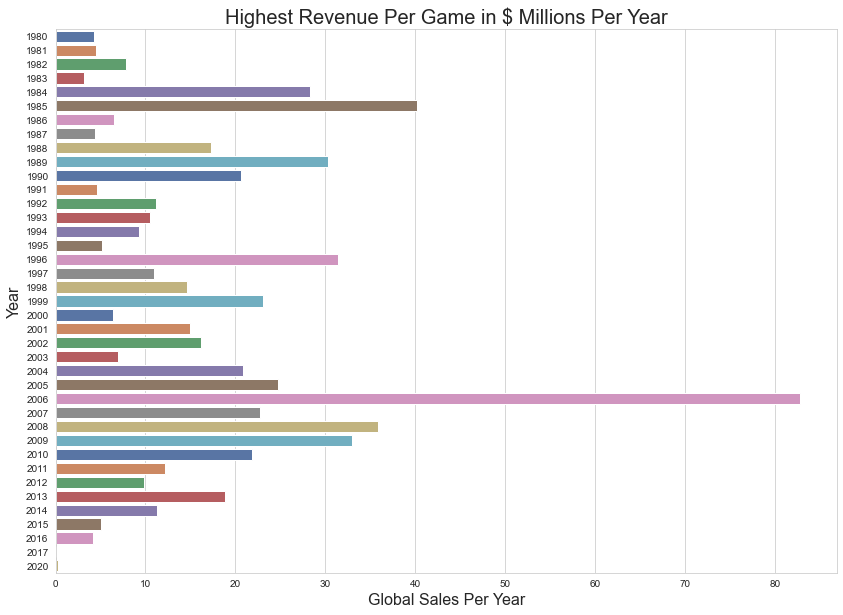

In [461]:
table = df.pivot_table('Global_Sales', index='Name', columns='Year')
table.columns = table.columns.astype(int)
games = table.idxmax()
sales = table.max()
years = table.columns
data = pd.concat([games, sales], axis=1)
data.columns = ['Game', 'Global_Sales']


colors = sns.color_palette("deep", len(years))
plt.figure(figsize=(14,10))
ax = sns.barplot(y = years , x = 'Global_Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Global Sales Per Year', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Highest Revenue Per Game in $ Millions Per Year', fontsize=20)
plt.show();

In [462]:
data = data.join(df['Platform'])
data = data.join(df['Publisher'])
data = data.join(df['NA_Sales'])
data = data.join(df['EU_Sales'])
data = data.join(df['JP_Sales'])

In [469]:
data.sort_values(by='Global_Sales', ascending=False).iloc[:1]

,Game,Global_Sales,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales
2006,Wii Sports,82.74,DS,Nintendo,0.52,0.06,0.41


Вывод:
    - по мировым продажам самая прибыльная игра оказалась игра 2006 года от компании Nintendo, на платформе DS - Wii Sports (прошло уже 14 лет, а затмить так никому ее не удалось);

In [470]:
data.sort_values(by='NA_Sales', ascending=False).iloc[:1]

,Game,Global_Sales,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales
2015,Call of Duty: Black Ops 3,5.064,Wii,Electronic Arts,0.94,0.02,0.0


Вывод:
- в Северной Америке самой прибыльной оказалась игра 2015 года от компании Electronic Arts, на платформе Wii - Call of Duty: Black Ops 3;

In [471]:
data.sort_values(by='EU_Sales', ascending=False).iloc[:1]


,Game,Global_Sales,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales
2004,Grand Theft Auto: San Andreas,20.81,PS4,Slightly Mad Studios,0.17,0.69,0.02


Вывод:
- в Европе самой прибыльной оказалась игра 2004 года от компании Slightly Mad Studios, на платформе PS4 - Grand Theft Auto: San Andreas;

In [472]:
data.sort_values(by='JP_Sales', ascending=False).iloc[:1]

,Game,Global_Sales,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales
2020,Imagine: Makeup Artist,0.29,NES,Hudson Soft,0.18,0.0,0.85


Вывод:
- самое массовое число выпущенных видеоигр зафиксировано в 2008 и 2009 годах 1431 и 1428 соотвественно;
- самое массовое колличество видеоигр выпустила компания Electronic Arts - 1339;
- самой прибыльной оказалась компания Nintendo с общей выручкой в 1784 млн долларов;
- лидирующими платформами на которых выпустили наибольшее количество игр оказалась - Nintendo DS и Sony PS2;
- самой прибильной оказалась платформа - PS2;
- сновной доход с видеоигр, независимо от географического положения, пришелся на период с 2005 - 2010 годы;
- лидирующими жанрами по количеству видеоигр и доходу с них оказались Action и Sports, реализованные на следующих платформах:
  - Action - PS3, PS2, Xbox360
  - Sports - Wii, PS2
- самыми прибыльными стали следующие видеоигры:
  - по мировым продажам - игра 2006 года от компании Nintendo, на платформе DS - Wii Sports (прошло уже 14 лет, а затмить так никому ее не удалось);
  - в Северной Америке -  игра 2015 года от компании Electronic Arts, на платформе Wii - Call of Duty: Black Ops 3;
  - в Европе - игра 2004 года от компании Slightly Mad Studios, на платформе PS4 - Grand Theft Auto: San Andreas;
  - в Японии - игра 2020 года от компании Hudson Soft, на платформе NES - Imagine: Makeup Artist;